# Seaborn 개요
- matplotlib의 성능 및 디자인을 업그레이드
- 판다스의 DataFrame을 대상으로 시각화 한다.
- 공식 사이트:https://seaborn.pydata.org
- seaborn 데이터셋 위치 : https://github.com/mwaskom/seaborn-data

## 실습 데이터셋 확인


In [91]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 셋팅
matplotlib.rcParams['font.size'] = 12 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus']= False # 유니코드가 '-'기호로 설정되는 폰트가 깨지는 것을 방지

In [48]:
import seaborn as sns
# 샘플 데이터셋 로딩
df = sns.load_dataset('mpg') # 자동차의 연비데이터
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
#include를 사용하면 해당하는 데이터 타입의 정보만 가져올 수 있다.
df.describe(include=object) 

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [52]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [53]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

# 관계형 그래프

## replot()
- 변수간의 상관성을 시각화 하는 그래프
- 주요 파라메터
    - kind: 그래프의 종류를 선택(선택값: 'line', 'scatter'(default))
    - hue: 주어진 범주형 데이터에 따른 데이터를 다른 색으로 구분해서 보여준다.
  

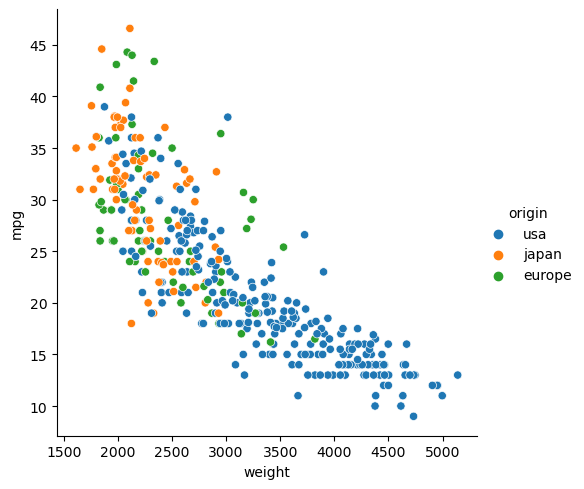

In [61]:
sns.relplot(data=df, x ='weight',y='mpg',hue='origin')
plt.show()

- col 매개변수에 범주형 컬럼을 지정하여 해당 컬럼의 범주 값 만큼 그래프를 분할하여 보여준다.

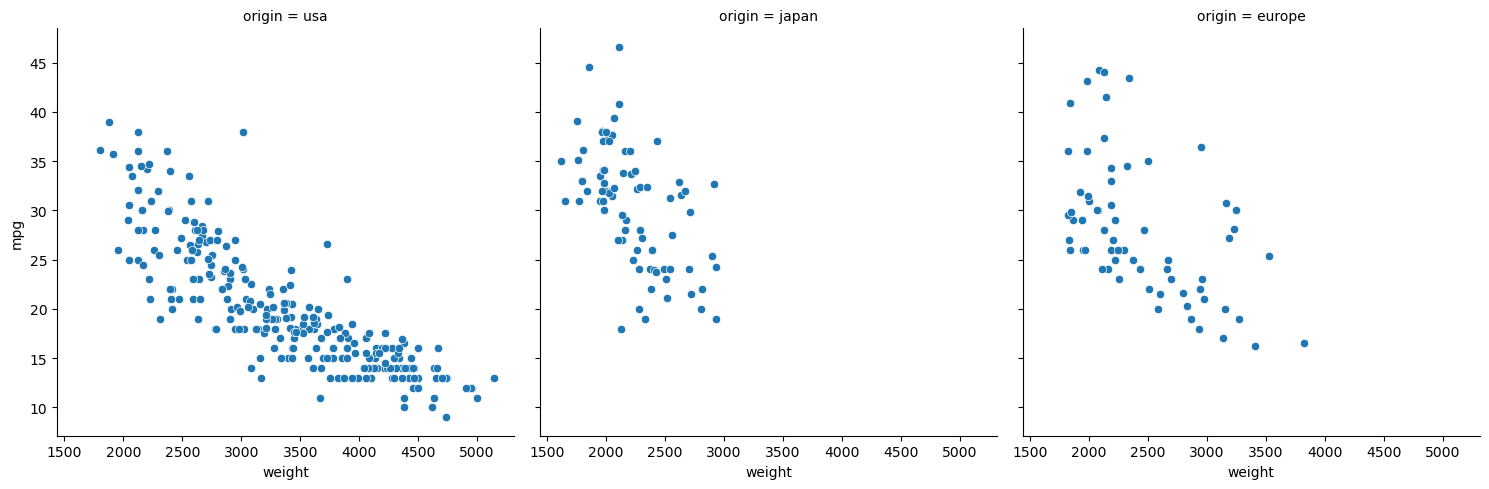

In [62]:
sns.relplot(data=df, x ='weight',y='mpg',col='origin')
plt.show()

## regplot()
- 선형회귀선을 추가적으로 보여준다,

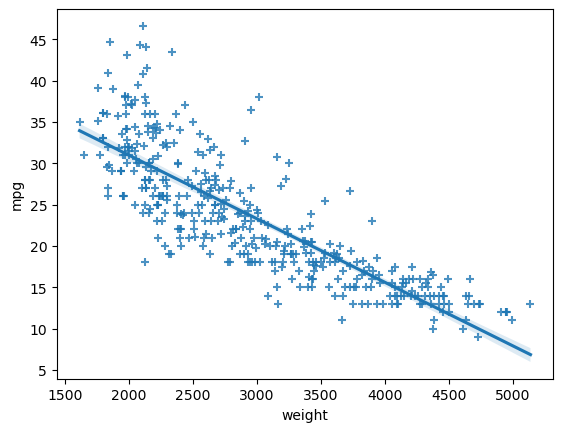

In [66]:
sns.regplot(data=df, x ='weight',y='mpg',marker='+')
plt.show()

## pairplot()
- 각 변수들의 분포와 모든 변수들간의 분포 관계를 보여준다.
- 단점:컬럼의 개수가 많으면 많을수록 시간이 오래걸림(원하는 컬럼만 추출해서 그릴 수 있다.)
    - var:보고싶은 컬럼명을 리스트로 전달

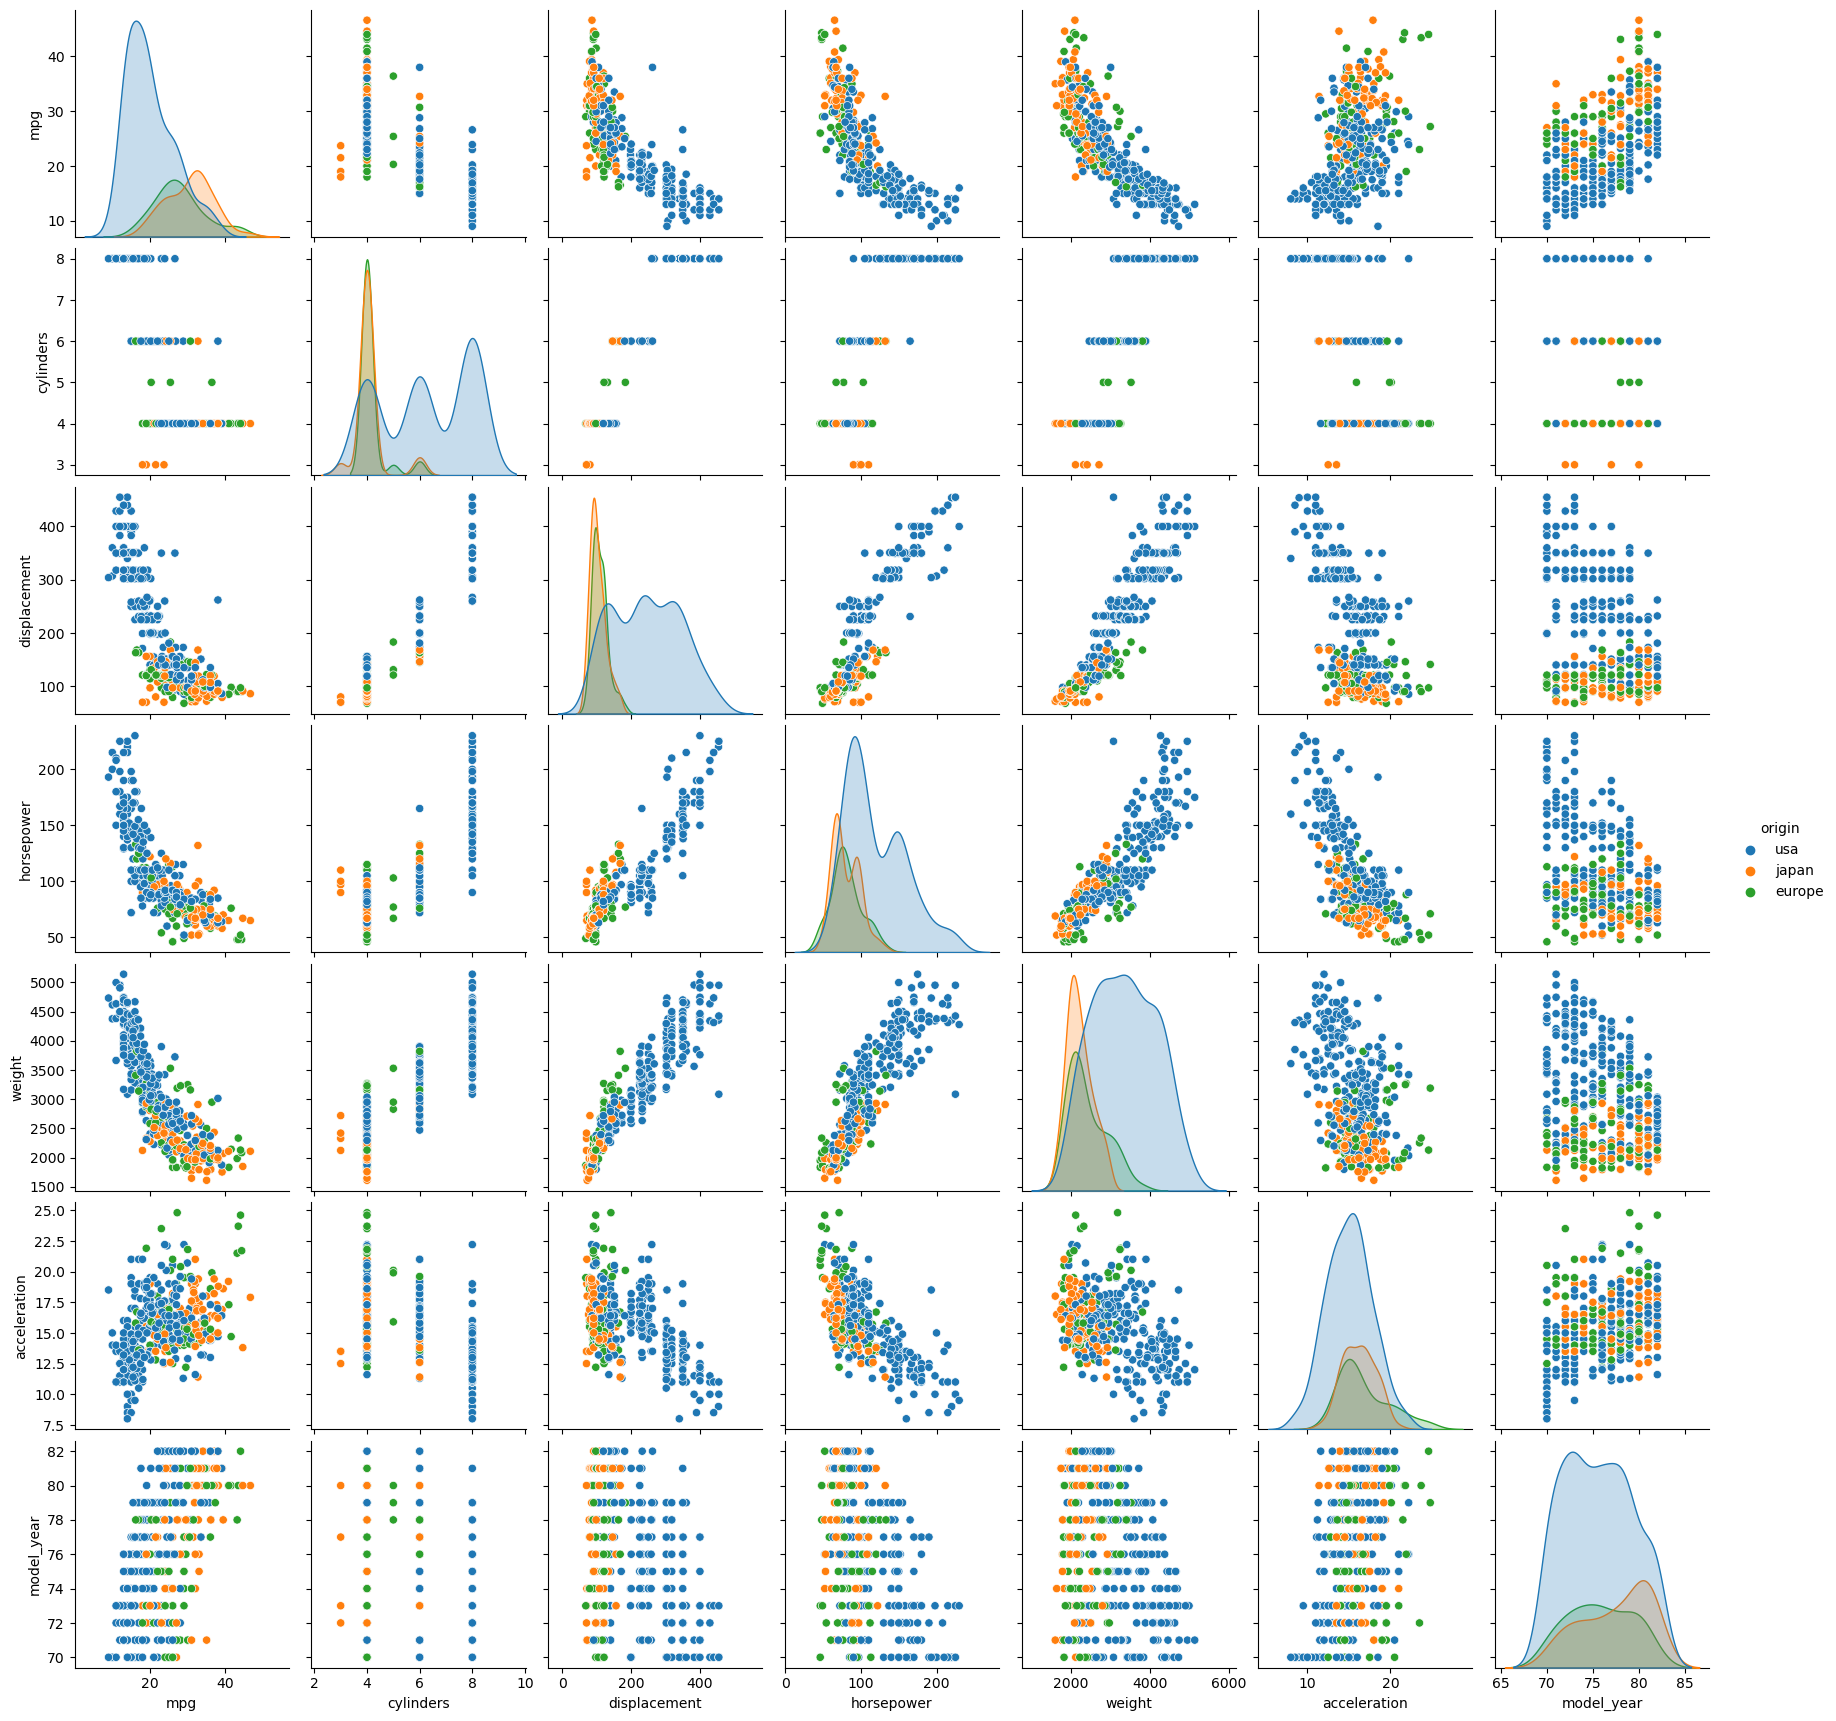

In [69]:
sns.pairplot(data=df,hue='origin')
plt.show()

## lineplot()
- 연속형 데이터에 대한 관계를 선 그래프로 보여준다.
- 같은 x값에 대해 여러 개의 y값을 갖는 경우에는 각 x값에 대한 평균(실선)과, 95%의 신뢰구간을 평균위주로 보여준다.
- lineplot()은 그래프를 그리기 전에 x값을 기준으로 데이터를 정렬하고 그래프를 그린다.

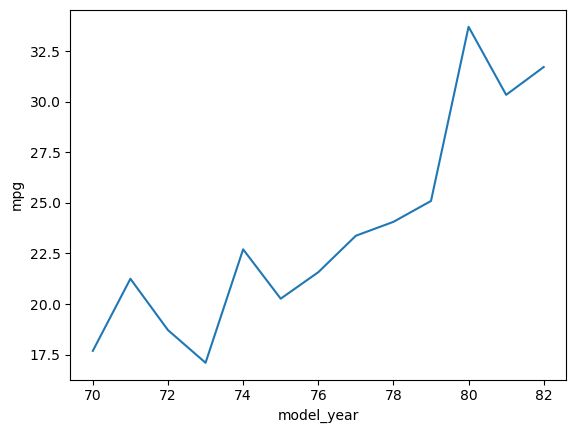

In [74]:
# ci:신뢰구간 그림자로 나타남, 없애기 위해서는 None으로 지정
sns.lineplot(data=df,x='model_year',y='mpg',ci=None) 
plt.show()

## heatmap()
- 데이터의 상관관계 정도에 따라 색차이를 부여한 그래프

In [6]:
iris = sns.load_dataset('iris')
iris.columns = ['꽃받침 길이','꽃받침 넓이','꽃잎 길이','꽃잎 넓이','품종']
iris.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
iris['품종'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# -1~1범위를 가짐
# corr메서드는 각 열 간의 상관 계수를 반환하는 메서드입니다.
corr = iris.corr()  
corr

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
꽃받침 길이,1.000000,-0.117570,0.871754,0.817941
꽃받침 넓이,-0.117570,1.000000,-0.428440,-0.366126
꽃잎 길이,0.871754,-0.428440,1.000000,0.962865
꽃잎 넓이,0.817941,-0.366126,0.962865,1.000000


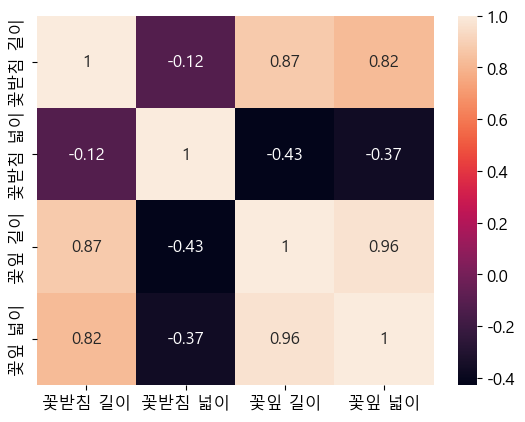

In [13]:
sns.heatmap(corr, annot=True)
plt.show()

# 분포형 그래프

## 히스토그램
- 주요 파라미터
    - kde: True/False 값. 밀도를 추정할 수 있다.
    - kind: 값을 지정하지 않으면 기본적으로 'hist'가 된다.('KDE')

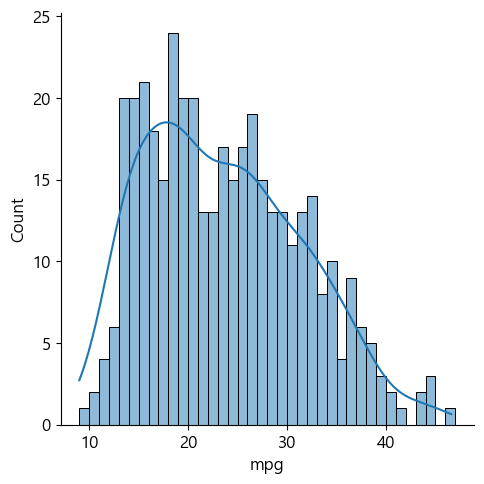

In [17]:
sns.displot(data=df,x='mpg',kde=True,binwidth=1)
plt.show()

- y파라미터만 지정하면 가로로 된 히스토그램을 그린다.

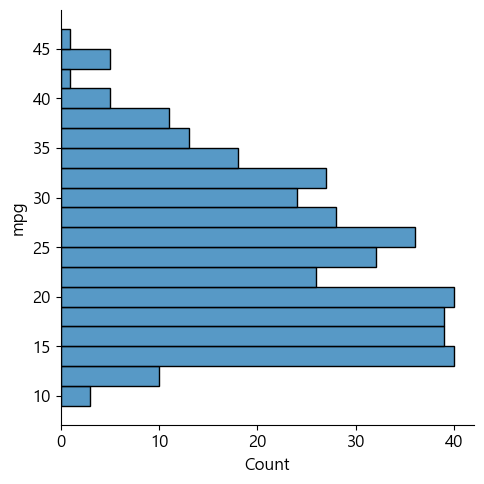

In [100]:
sns.displot(data=df,y='mpg',binwidth=2)
plt.show()

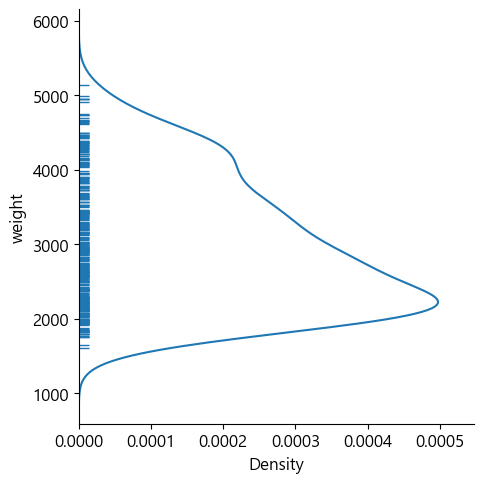

In [102]:
sns.displot(df,x='mpg',y='weight',kind='kde',rug=True)
plt.show()

## 히스토그램:histplot()

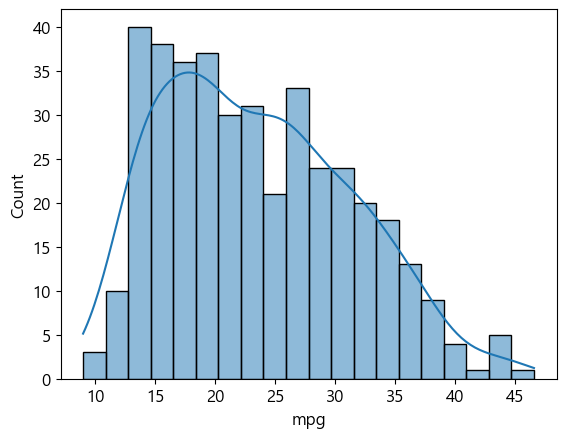

In [108]:
sns.histplot(df['mpg'],bins=20,kde=True)
plt.show()

## barplot()
- x축에는 범주형 변수, y축에는 연속형 변수를 입력
- x에 연속형, y에 변수혀을 넣으면 수평 막대그래프를 출력
- estimator: 평균(기본값,np.mean), 합(np.sum), 카운트(np.count), 중앙값(np.median), 표준편차(np.std)


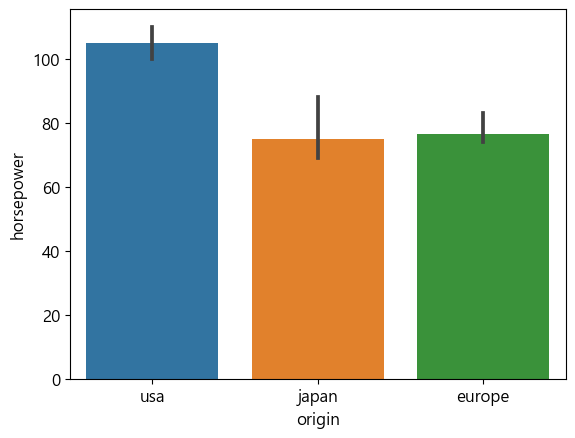

In [124]:
sns.barplot(data=df,x='origin',y='horsepower',estimator=np.median)
plt.show()

## boxplot()

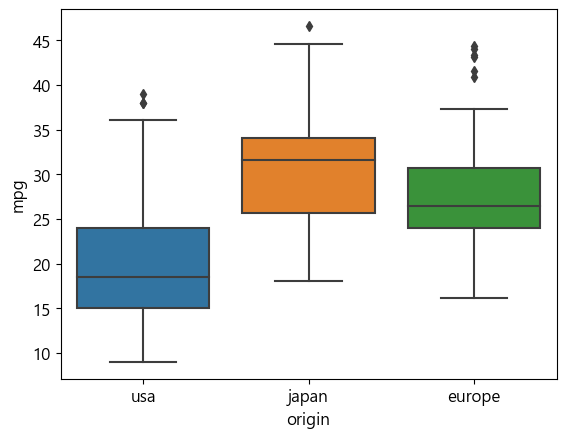

In [127]:
sns.boxplot(data=df,x='origin',y='mpg')
plt.show()

## violinplot()
- 데이터의 분포에 따라 통통하고 홀쭉하게 표현하는 모습이 바이올린을 닮은 그래프
- boxplot()은 이상치를 한 눈에 파악할 수 있고, violinplot()은 데이터 분포를 한눈에 파악할 수 있다.

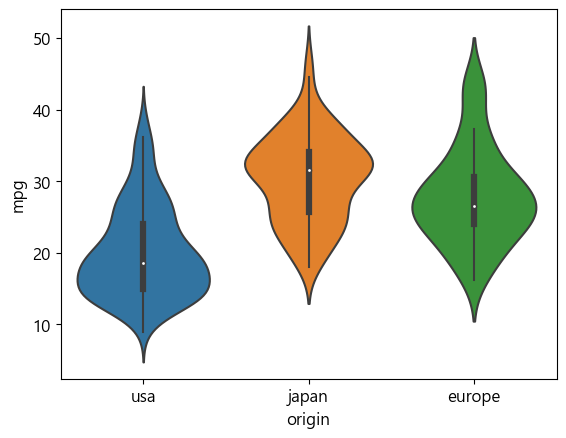

In [129]:
sns.violinplot(data=df,x='origin',y='mpg')
plt.show()